# Unstructured Text Analysis

Sarah Samuel  
CS 344, Final Project

### Vision: 


   In order to understand the purpose of the Unstructured Text Analysis project, it is important to look at and understand the primary data set which I will be utilizing. Below you will see the first few rows of the “5yearshistoricaldata” dataset that I have obtained from Service Express’ database. I will be using the TcaProblem field, which contains information about customers’ equipment that needs servicing, and the TcaPart field, which indicates the hardware part used to repair the issue. The TcaProblem field is most often filled in by the customer and typically forms a complaint or concern. This field contains words (unstructured text). The TcaParts field, on the other hand,  is filled in by a Field Engineer after the issue is fixed, and holds a short description of a hardware part (i.e ‘Power Supply’). My plan is to develop a program that can accurately predict a hardware part when a new problem comes in. This problem can be described as both a supervised learning problem and a multi-class categorization one. The main purpose is to maximize the efficiency of Service Express’ Field Service Engineers’ operations as they use this tool to guide their decision as to which part to use when a new service ticket comes in.  


In [3]:
import pandas as pd
# read in csv

uta_df = pd.read_csv("historicalData5years.csv")
uta_df.head()

,TcaPkey,TcaCompletedDate,TcaProblem,Part
0,708225,00:00.0,Keeps rebooting like before. See ticket #698931.,POWER SUPPLY
1,710945,20:00.0,Library controller will not boot with RAID car...,CONTROLLER
2,710945,20:00.0,Library controller will not boot with RAID car...,MONITOR
3,711988,30:00.0,DS4300 TOP - Failed controler and failed contr...,BATTERY
4,711988,30:00.0,DS4300 TOP - Failed controler and failed contr...,CONTROLLER


### Background:


I initially started this project by trying to predict a hardware part by tokenizing a problem field into uni-grams, and implemented the logic in SQL. The process was as follows: I parse a single ticket into unigrams. Next, I parse the TcaProblem field and the TcaPart field from a historical dataset into unigrams. Lastly, I join historical data results onto the parsed single ticket. This associates the words of a single ticket to historical data, and allows to predict the part that may be needed. Below is a picture of the results I receive for a particular TcaProblem field that reads : “power down rear fan”. 


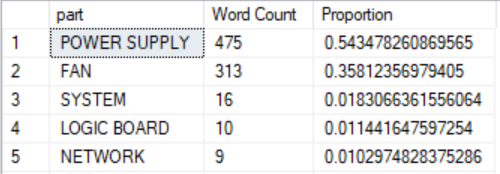

Because I wanted stronger confidence in my results than what SQL was giving me, I decided to tokenize words using n-grams. N-grams are a connected sequence of n-tokens, where n can be a sensible positive integer (Au Yeung, 2018) .  For my model, it makes sense to have n be less than 3, as TcaProblem fields contain short descriptions and do not contain full-fledged sentences. I was able to gain context about n-grams from a thorough blog post written by Alvin Au Yeung: http://www.albertauyeung.com/post/generating-ngrams-python/ . Additionally, this article written by Tan, Wang, and Lee explains how n-gram logic is rooted in the Naive Bayes approach: https://www.sciencedirect.com/science/article/abs/pii/S0306457301000450. I am utilizing n-gram functionality to assign frequencies to words as they associate with hardware parts. 

I found the need to use n-grams when I realized that the sequences of words in the TcaProblem field affected the frequency of words, and therefore the associations between words and parts. For example, the words “failed” and “bad” are commonly used to describe a hard-drive, or hard-disk. Moreover, Service Express repairs proportionately more hard-drives than any other hardware part. This means that there are more instances of hard-drive in the dataset, than any other hardware part. Due to these reasons, the results are very skewed when the TcaProblem fields include particular words like “failed” and “bad”. For example, one TcaProblem reads “failed raid controller” but my SQL program suggests “Hard Drive” as a hardware part.  Therefore n-grams should (in theory) be able to capture the words of TcaProblem in context now that it can tokenize the sentence into 2, 3 or n chunks. With n-grams, the associations will no longer occur on a single token, rather they will occur on tokens that have more information since it contains 2-3 contiguous words in a single string. If the TcaProblem says “my fan failed” I am expecting to see my program not so readily suggest hard-drive, but instead suggest a more sensible part, such as a fan assy. 

As I continued researching about n-grams and examples that use the nltk library, I did not find  projects that are very similar to mine. Instead, I got a deeper understanding of the functionality of the aforementioned tools. This makes sense because my project was an idea that was developed by the Business Intelligence team when they saw the need to expedite certain processes of a Field Engineer’s job. This project is a test run to fit a business need. I classify this project as a combination of projects - it utilizes the supervised learning logic in Paul Graham’s A Plan for Spam program and is also similar to a multi-class categorization problem. 


### Implementation: 

As I mentioned above, I am essentially creating a supervised machine learning model that implements text classification. And, it can also be considered to be a multi-class categorization problem. This is because a problem can be categorized to a hardware part, and there are multiple (over hundreds) of classes for hardware parts.

My python model has the same approach as the SQL model, but I use more data manipulation libraries (a few of which are mentioned below). This project starts with data wrangling and manipulation, where I clean the data by including a list of stopwords, lower-case words, remove punctuation etc… and restructure the data frame. I am tokenizing the TcaProblem field words, in closed tickets, into n-grams (first into bi-grams and next into tri-grams), using python’s nltk (natural language toolkit) package. Then, I join and the resulting list n-grams onto a data frame. You can see below what my updated data frame looks like:

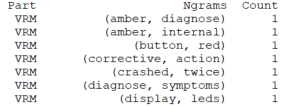

I then do the same for a new single ticket which does not have a hardware part associated with it:



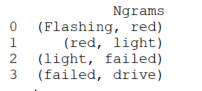

Next, I join the two data frames on the n-grams column so that you’re left with hardware parts that the model predicts will solve the issue in the new tcaProblem. Lastly, I use soft-max logic to decide the likelihood of the hardware part being the right part. Picture below:

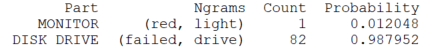

### Results and future endeavours: 
 

Adding n-gram functionality to this project has improved results by being able to take the context of the words into consideration. This means that the program has fewer hardware parts suggested as it is able to weed out the parts that are rarely associated with a problem. This is handy because it narrows down the options for the field engineers. Spewing out fewer results also means that each result is suggested with more certainty. But, I am not convinced that it has effectively fixed the main issue of not suggesting hard-drive when “failed” or “bad” is in the problem field. As you can see below, my program still suggests a hard-drive when my TcaProblem was “Flashing red light failed drive”. But, when I change the word “failed” to “bad”, my program will suggest monitor with an associated probability of 1.0, as it does not suggest any other parts. My uni-gram model, on the other hand, primarily suggests power supply and claims that there is only 2.7% chance that monitor is the right hardware part needed to fix the problem.
(Top: bi-gram results, bottom: uni-gram results).  

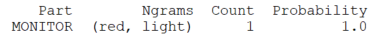

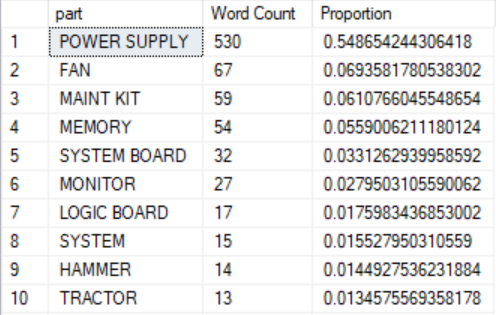

The TcaProblem I used above is not from a random, fabricated ticket. In fact, it is a closed ticket that is not a part of the data used to create associations between words and parts. Because it is a closed ticket, I am able to look it up in Service Express’ database and see the hardware part that was actually used to fix the issue. The hardware part used was a monitor. Therefore, the bi-grams’ suggestion was more accurate than the unigram’s. However, it is evident that the bi-grams model is a brittle system - I cannot say with certainty that it is, in fact, a significantly improved supervised model.

I have found out that the threshold for my dataset is tri-grams. About 80% of the times, I am returned “Empty Dataframe” when I let n = 3. I presume this is because either my data is not sufficient (informed enough) to produce associations, and/or the algorithm I am implementing is not robust. I am going to take Professor VanderLinden’s suggestion to implement a deep neural network. In fact, the next step in the Unstructured Text Analysis is to use Ludwig in order to see if precision can be improved in predicting hardware parts, given a particular problem.

### Ethical Implications: 

When I first began this project for Service Express, and had little information about Field Engineers’ job, I was worried that I was automating their job which would slowly lead to layoffs. This is definitely not the case. Instead, I am streamlining tedious and time-consuming processes so that they can save their resources, in addition to having equipment that is backed up by statistics.


Links to resources:

1. https://stats.stackexchange.com/questions/25696/regarding-using-bigram-n-gram-model-to-build-feature-vector-for-text-document  
2. http://text-analytics101.rxnlp.com/2014/11/what-are-n-grams.html
3. https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.merge.html
4. https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.groupby.html
5. https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
6. https://medium.com/jbennetcodes/how-to-rewrite-your-sql-queries-in-pandas-and-more-149d341fc53e
7. http://www.albertauyeung.com/post/generating-ngrams-python/
8.  https://www.sciencedirect.com/science/article/abs/pii/S0306457301000450

# Code and output:

In [5]:
import pandas as pd
import numpy as np
import string
import codecs
import nltk
import os
import re
from nltk.corpus import stopwords

In [6]:
uta_df = pd.read_csv("historicalData5years.csv")
uta_df.head()

,TcaPkey,TcaCompletedDate,TcaProblem,Part
0,708225,00:00.0,Keeps rebooting like before. See ticket #698931.,POWER SUPPLY
1,710945,20:00.0,Library controller will not boot with RAID car...,CONTROLLER
2,710945,20:00.0,Library controller will not boot with RAID car...,MONITOR
3,711988,30:00.0,DS4300 TOP - Failed controler and failed contr...,BATTERY
4,711988,30:00.0,DS4300 TOP - Failed controler and failed contr...,CONTROLLER


In [7]:
#create a list of stopwords

nltk.download('stopwords')
stop_words = stopwords.words('english') 
more_stop = ['gb','needs','consume','appears','service','ticket',
             'code','x','parts','model','pn','part','number',
             'need','onsite','spare','last','part','number','week',
             'would','like','we','judy','still','stays','stay',
             'doesnt','getting','keeps','back','replaced','two',
             'one','three','g','call','home','yesterday','today',
             'itll','think','customer','ts','noc','thinks','minutes',
             'thought','e','hi','k','gb','call','need','needs','please']
stop_words.extend(more_stop)
print(len(stop_words))

235


[nltk_data] Downloading package stopwords to /home/ss63/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
#clean up TcaProblem field and only keep words that are not in stop_words

uta_df['TcaProblem'] = uta_df['TcaProblem'].astype(str)
uta_df.TcaProblem = uta_df['TcaProblem'].str.lower()
uta_df['TcaProblem'] = uta_df['TcaProblem'].str.replace('[{}]'.format(string.punctuation), '')
uta_df['TcaProblem'] = uta_df['TcaProblem'].str.replace('\d+', '')
uta_df['TcaProblem'] = uta_df['TcaProblem'].apply(lambda x: [item for item in x.split() if item not in stop_words])

#reformat cleaned up TcaProblem field
uta_df['TcaProblem'] = uta_df['TcaProblem'].astype(str)
uta_df['TcaProblem'] = uta_df['TcaProblem'].str.replace('[{}]'.format(string.punctuation), '')

In [10]:
#create an n-gram list and add it to the dataframe

ngram_list = list()
for x in uta_df.TcaProblem:
    ngram_words = list(nltk.ngrams(x.split(), 2)) #change 3 to any sensible positive int.
    ngram_list.append(ngram_words)
uta_df['Ngrams'] = ngram_list

In [11]:
#places n-gram tuples into list, when part is index

uta_df2 = pd.DataFrame(uta_df['Ngrams'].values.tolist(), index= uta_df.Part)
stack = uta_df2.stack()
uta_stacked_df = pd.DataFrame(stack)

uta_df3 = uta_stacked_df.reset_index()
uta_df3.columns = ['Part','Count', 'Ngrams']
print(uta_df3.head())

           Part  Count                 Ngrams
0  POWER SUPPLY      0       (rebooting, see)
1    CONTROLLER      0  (library, controller)
2    CONTROLLER      1     (controller, boot)
3    CONTROLLER      2           (boot, raid)
4    CONTROLLER      3           (raid, card)


In [13]:
#group by Part, then Ngrams and rank by most common

uta_df3_grouped = uta_df3.groupby(['Part', 'Ngrams'], as_index=False).count()
uta_df3 = uta_df3_grouped.sort_values(by = ['Part','Count'], ascending = False)

uta_df3 = pd.DataFrame(uta_df3)
uta_df3 = uta_df3.groupby('Part').head(15)

In [18]:
#place single ticket into a list and parse the problem into bi-grams

tca_problem = ["Flashing red light bad drive"]

for x in tca_problem:
    ngram_words = list(nltk.ngrams(x.split(), 2)) 
ngram_words

#place the parsed ticket into a dataframe
single_ticketdf = pd.DataFrame()
single_ticketdf['Ngrams'] = ngram_words
print(single_ticketdf)

            Ngrams
0  (Flashing, red)
1     (red, light)
2     (light, bad)
3     (bad, drive)


In [19]:
'''
Join the parsed single-ticket df onto the bi-gram df. This associates the bi-grams of the single-ticket
to hardware parts in the unstrucdf_3 df and then predicts which hardware part should be used to fix the issue
'''
merge_df = pd.merge(uta_df3,single_ticketdf, on='Ngrams', how='inner')

prop = merge_df['Count']/sum(merge_df['Count'])
merge_df['Probability'] = prop
print(merge_df)

      Part        Ngrams  Count  Probability
0  MONITOR  (red, light)      1          1.0
